<a href="https://colab.research.google.com/github/Ivanova-Daria/labs/blob/main/%D0%9B%D0%B0%D0%B1__7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 9

# Нормализация данных временных рядов

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from pandas import read_excel
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [ ]:
url='http://pogoda-service.ru/archive_gsod_res.php?country=IZ&station=406600&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=Посмотреть'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

In [ ]:
df.columns = ['Data','2','3','Temp','4','5','6','7']
df= df[['Data', 'Temp']]
df.set_index(['Data'], inplace = True)
df

,Temp
Data,
08.06.2012,37.5
16.06.2012,43.1
28.06.2012,37.5
14.07.2012,40.8
18.07.2012,41.9
...,...
01.12.2017,16.3
03.12.2017,15.3
04.12.2017,14.2


In [ ]:
print(df.head())
values = df.values
values = values.reshape((len(values),1))
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
norm = scaler.transform(values)
for i in range(5):
  print(norm[i])
inversed = scaler.inverse_transform(norm)
for i in range(5):
  print(inversed[i])

            Temp
Data            
08.06.2012  37.5
16.06.2012  43.1
28.06.2012  37.5
14.07.2012  40.8
18.07.2012  41.9
Min: 3.100000, Max: 43.100000
[0.86]
[1.]
[0.86]
[0.9425]
[0.97]
[37.5]
[43.1]
[37.5]
[40.8]
[41.9]


# Стандартизация

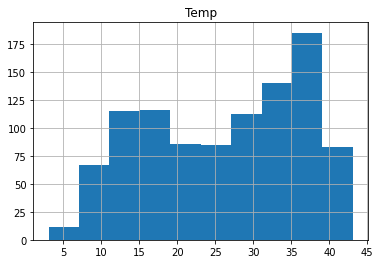

In [ ]:
url='http://pogoda-service.ru/archive_gsod_res.php?country=IZ&station=406600&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=Посмотреть'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df.columns = ['Data','2','3','Temp','4','5','6','7']
df= df[['Data', 'Temp']]
df.set_index(['Data'], inplace = True)
from matplotlib import pyplot
df.hist()
pyplot.show()

In [ ]:
scalar = StandardScaler()
scalar=scalar.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scalar.mean_, sqrt(scalar.var_)))
norm = scalar.transform(values)
for i in range(5):
  print(norm[i])
inversed = scalar.inverse_transform(norm)
for i in range(5):
  print(inversed[i])

Mean: 26.192600, StandardDeviation: 10.180006
[1.11074589]
[1.66084379]
[1.11074589]
[1.43491072]
[1.54296567]
[37.5]
[43.1]
[37.5]
[40.8]
[41.9]


# Таблица полученных результатов

In [ ]:
data = {'Min':scaler.data_min_,'Max': scaler.data_max_,'Среднее значение':scalar.mean_,'Стандартное отклонение': sqrt(scalar.var_)}
df1=pd.DataFrame(data)
df1.columns = pd.MultiIndex.from_tuples(zip(['Нормализация', '','Cтандартизация', ''], df1.columns))
df1

,Нормализация,,Cтандартизация,
,Min,Max,Среднее значение,Стандартное отклонение
0,3.1,43.1,26.1926,10.180006
